In [1]:
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import shutil
import kagglehub

dataset_path = '/root/.cache/kagglehub/datasets/nikitarom/planets-dataset/versions/3/planet/planet' # Corrected path to the downloaded dataset

if not os.path.exists(dataset_path):
  path = kagglehub.dataset_download("nikitarom/planets-dataset")
  print("Path to dataset files:", path)
  dataset_path = os.path.join(path, 'planet', 'planet') # Adjust path if kagglehub downloads to a different structure
else:
  path = '/root/.cache/kagglehub/datasets/nikitarom/planets-dataset/versions/3' # Keep original path logic if dataset is already there
  dataset_path = os.path.join(path, 'planet', 'planet') # Adjust path if kagglehub downloads to a different structure
  print("Dataset already downloaded. Path:", dataset_path)


df = pd.read_csv(os.path.join(dataset_path, 'train_classes.csv'))
print(df)

# Detecta automaticamente a coluna de tags
if 'tags' in df.columns:
    tag_col = 'tags'
else:
    tag_col = [c for c in df.columns if 'tag' in c.lower() or 'labels' in c.lower() or 'class' in c.lower()][0]

source_dir = os.path.join(dataset_path, 'train-jpg')  # Pasta de origem das imagens
dest_dir = '/content/dataset/clear'  # Pasta de destino 1
destino_dir = '/content/dataset/cloudy'  # Pasta de destino 2
img_dir = os.path.join(dataset_path, 'train-jpg') # Use dataset_path

# Explode as tags (separadas por espaço) e conta a frequência de cada uma
exploded = df[tag_col].astype(str).str.split().explode()
counts = exploded.value_counts().sort_values(ascending=False)

# Exibe as frequências
print('Frequência por tag:')
print(counts.to_string())

# Calcular a interseção entre duas tags (tag1 e tag2) e mostrar a quantidade de imagens que possuem ambas

tag1 = 'clear'  # Altere para a tag desejada
tag2 = 'cloudy'       # Altere para a tag desejada
# Função para verificar se ambas as tags estão presentes
mask = df[tag_col].apply(lambda x: tag1 in x.split() and tag2 in x.split())

intersec_count = mask.sum()
print(f"Quantidade de imagens com as duas tags ('{tag1}' e '{tag2}'): {intersec_count}")

# Copiar todas as imagens com a tag 'clear' para a pasta 'dataset/clear'

# Caminhos das pastas

os.makedirs(dest_dir, exist_ok=True)  # Cria a pasta de destino, se não existir
os.makedirs(destino_dir, exist_ok=True) # Cria a pasta de destino para cloudy, se não existir

# Filtrar imagens com a tag 'clear'
clear_images = df[df[tag_col].str.contains('clear')]['image_name']

# Copiar as imagens
print(f"Copying {len(clear_images)} clear images to {dest_dir}...")
for img_name in clear_images:
    src_path = os.path.join(source_dir, f"{img_name}.jpg")
    dest_path = os.path.join(dest_dir, f"{img_name}.jpg")
    if os.path.exists(src_path):
        # print(f"Copiado: {img_name}.jpg") # Optional: uncomment for detailed copying logs
        shutil.copy(src_path, dest_path)
    else:
        print(f"Imagem não encontrada: {img_name}.jpg")
print("Finished copying clear images.")

# Caminhos das pastas


# Filtrar imagens com a tag 'cloudy'
cloudy_images = df[df[tag_col].str.contains('cloudy')]['image_name']

# Copiar as imagens
print(f"Copying {len(cloudy_images)} cloudy images to {destino_dir}...")
for img_name in cloudy_images:
    src_path = os.path.join(source_dir, f"{img_name}.jpg")
    dest_path = os.path.join(destino_dir, f"{img_name}.jpg")
    if os.path.exists(src_path):
        # print(f"Copiado: {img_name}.jpg") # Optional: uncomment for detailed copying logs
        shutil.copy(src_path, dest_path)
    else:
        print(f"Imagem não encontrada: {img_name}.jpg")
print("Finished copying cloudy images.")
'''

'\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport os\nfrom PIL import Image\nimport shutil\nimport kagglehub\n\ndataset_path = \'/root/.cache/kagglehub/datasets/nikitarom/planets-dataset/versions/3/planet/planet\' # Corrected path to the downloaded dataset\n\nif not os.path.exists(dataset_path):\n  path = kagglehub.dataset_download("nikitarom/planets-dataset")\n  print("Path to dataset files:", path)\n  dataset_path = os.path.join(path, \'planet\', \'planet\') # Adjust path if kagglehub downloads to a different structure\nelse:\n  path = \'/root/.cache/kagglehub/datasets/nikitarom/planets-dataset/versions/3\' # Keep original path logic if dataset is already there\n  dataset_path = os.path.join(path, \'planet\', \'planet\') # Adjust path if kagglehub downloads to a different structure\n  print("Dataset already downloaded. Path:", dataset_path)\n\n\ndf = pd.read_csv(os.path.join(dataset_path, \'train_classes.csv\'))\nprint(df)\n\n# Detecta automaticament

In [2]:

# import os
# from PIL import Image
# import numpy as np

# # --- Configure o caminho para UM ficheiro de imagem ---
# # (Use o mesmo caminho base que o seu script de treino)
# base_dir = '/kaggle/input/dataset/dataset'
# pasta_classe = 'clear' # ou 'cloudy'

# # 1. Verifique se a pasta existe e liste o primeiro ficheiro
# try:
#     caminho_pasta = os.path.join(base_dir, pasta_classe)
#     print(f"Verificando pasta: {caminho_pasta}")

#     # Pega o primeiro ficheiro que encontrar na pasta
#     nome_ficheiro = os.listdir(caminho_pasta)[0]
#     caminho_ficheiro = os.path.join(caminho_pasta, nome_ficheiro)
#     print(f"Ficheiro de teste encontrado: {caminho_ficheiro}")

#     # 2. Verifique o TAMANHO do ficheiro em bytes
#     tamanho_bytes = os.path.getsize(caminho_ficheiro)
#     print(f"TAMANHO DO FICHEIRO: {tamanho_bytes} bytes")

#     if tamanho_bytes < 1000: # Se for menor que 1KB, é quase de certeza um ficheiro vazio/corrompido
#         print("!!!! ALERTA: O ficheiro é muito pequeno. Provavelmente está vazio. !!!!")

#     # 3. Tente carregar o ficheiro com a biblioteca PIL (Pillow)
#     print("Tentando carregar com a biblioteca PIL...")
#     img = Image.open(caminho_ficheiro)
#     img.load() # Força a leitura dos dados

#     print("... Sucesso ao carregar com PIL.")
#     print(f"Formato da imagem (PIL): {img.mode}")
#     print(f"Tamanho da imagem (PIL): {img.size}")

#     # 4. Converta para numpy para ver os pixels
#     img_array = np.array(img)
#     print(f"Shape do array (Numpy): {img_array.shape}")
#     print(f"Valor Mínimo (Numpy): {img_array.min()}")
#     print(f"Valor Máximo (Numpy): {img_array.max()}")

# except Exception as e:
#     print(f"\n--- ERRO AO CARREGAR MANUALMENTE ---")
#     print(f"Falhou ao processar o ficheiro: {e}")
#     print("Isto confirma que os ficheiros de imagem estão vazios ou corrompidos.")


In [3]:
#importações de bibliotecas
from torchsummary import summary
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import time
import gc
import os
from tensorflow.keras.models import Model

2025-11-08 15:01:19.186148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762614079.423885      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762614079.498691      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
'''
# conversão de cmyk para rgb
import os
import shutil
from PIL import Image
import glob
from tqdm import tqdm # Para ter uma barra de progresso

# --- Configuração ---
# Caminho original com as imagens CMYK
source_dir = '/content/dataset'

# Nova pasta onde vamos guardar as cópias RGB
# (IMPORTANTE: Tem de ser numa pasta com permissão de escrita, como /kaggle/working/)
dest_dir = '/content/dataset_rbmk'
# --- Fim da Configuração ---

# Criar as pastas de destino
dest_clear_path = os.path.join(dest_dir, 'clear')
dest_cloudy_path = os.path.join(dest_dir, 'cloudy')

os.makedirs(dest_clear_path, exist_ok=True)
os.makedirs(dest_cloudy_path, exist_ok=True)

print(f"A converter imagens de '{source_dir}' para '{dest_dir}'...")

# Encontra TODAS as imagens .jpg dentro das subpastas (clear, cloudy)
#
source_files = glob.glob(os.path.join(source_dir, '*/*.jpg'))
print(f"Total de ficheiros .jpg encontrados: {len(source_files)}")

# Itera por todos os ficheiros com uma barra de progresso
for source_path in tqdm(source_files):
    try:
        # Abre a imagem com PIL (que consegue ler CMYK)
        img = Image.open(source_path)

        # Converte para RGB (o passo crucial)
        # Se já for RGB, não faz mal
        img_rgb = img.convert('RGB')

        # Monta o caminho de destino
        # Ex: .../input/.../clear/img1.jpg -> .../working/.../clear/img1.jpg
        relative_path = os.path.relpath(source_path, source_dir)
        dest_path = os.path.join(dest_dir, relative_path)

        # Guarda a nova imagem RGB
        img_rgb.save(dest_path)

    except Exception as e:
        print(f"\nErro ao converter {source_path}: {e}")

print("--- Conversão Concluída! ---")
print(f"Novos dados RGB prontos em: {dest_dir}")
'''

'\n# conversão de cmyk para rgb\nimport os\nimport shutil\nfrom PIL import Image\nimport glob\nfrom tqdm import tqdm # Para ter uma barra de progresso\n\n# --- Configuração ---\n# Caminho original com as imagens CMYK\nsource_dir = \'/content/dataset\'\n\n# Nova pasta onde vamos guardar as cópias RGB\n# (IMPORTANTE: Tem de ser numa pasta com permissão de escrita, como /kaggle/working/)\ndest_dir = \'/content/dataset_rbmk\'\n# --- Fim da Configuração ---\n\n# Criar as pastas de destino\ndest_clear_path = os.path.join(dest_dir, \'clear\')\ndest_cloudy_path = os.path.join(dest_dir, \'cloudy\')\n\nos.makedirs(dest_clear_path, exist_ok=True)\nos.makedirs(dest_cloudy_path, exist_ok=True)\n\nprint(f"A converter imagens de \'{source_dir}\' para \'{dest_dir}\'...")\n\n# Encontra TODAS as imagens .jpg dentro das subpastas (clear, cloudy)\n#\nsource_files = glob.glob(os.path.join(source_dir, \'*/*.jpg\'))\nprint(f"Total de ficheiros .jpg encontrados: {len(source_files)}")\n\n# Itera por todos os f

In [5]:
def VGG16():
   model = models.Sequential([

        layers.Rescaling(1./255, input_shape=(224,224,3)),
        # Arquitetura enxuta
        layers.Conv2D(32, (3,3), padding='same', activation='relu'),
        layers.Conv2D(32, (3,3), padding='same', activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
   ])
   model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
#    Loss = -[y * log(p) + (1 - y) * log(1 - p)]
   return model


In [6]:
def matplot_acc_loss(train_process):
    # 'train_process' é o objeto 'history' retornado pelo model.fit
    # Os dados estão no dicionário 'train_process.history'
    history_dict = train_process.history

    # Crie o eixo X (número de épocas)
    epochs_range = range(len(history_dict['loss']))

    plt.figure(figsize=(12,4))

    # --- Gráfico de Loss ---
    plt.subplot(1,2,1)
    # Acesse os dados do dicionário
    plt.plot(epochs_range, history_dict['loss'], 'ro-', label='Train Loss', linewidth=2)
    plt.plot(epochs_range, history_dict['val_loss'], 'bs-', label='Val Loss', linewidth=2)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # --- Gráfico de Accuracy ---
    plt.subplot(1,2,2)
    # Use 'accuracy' e 'val_accuracy'
    plt.plot(epochs_range, history_dict['accuracy'], 'ro-', label='Train Acc', linewidth=2)
    plt.plot(epochs_range, history_dict['val_accuracy'], 'bs-', label='Val Acc', linewidth=2)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.show()

In [7]:
# Função auxiliar para inspecionar os lotes de dados
def debug_data(dataset, message):
    print(f"\n--- DEBUG: {message} ---")
    # Pega um lote (batch) do dataset
    for images, labels in dataset.take(1):
        print(f"Formato (Shape) do lote de imagens: {images.shape}")
        print(f"Tipo de dados (dtype) das imagens: {images.dtype}")
        print(f"Valor MÍNIMO dos pixels: {tf.reduce_min(images).numpy()}")
        print(f"Valor MÁXIMO dos pixels: {tf.reduce_max(images).numpy()}")
        print(f"-----------------------------------\n")

In [8]:
def train_val_data_process_tfdata(datadir='/kaggle/input/dataset-rbmk/dataset_rbmk', img_size=(224,224), batch_size=32, val_split=0.2, seed=1, shuffle=True):
    print('Passando por train_val_data (SEM OVERSAMPLING, SIMPLESMENTE DATAGEN)')

    # 1. Carrega os datasets
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        datadir, validation_split=val_split, subset="training", seed=seed, shuffle=shuffle,
        image_size=img_size, batch_size=None
    )
    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        datadir, validation_split=val_split, subset="validation", seed=seed,
        image_size=img_size, batch_size=None
    )
    print(f"As classes são: {train_ds.class_names}")


    # --- INÍCIO DO DEBUG DE SHUFFLE (MÉTODO 1) ---
    print(f"\n--- DEBUG: Verificando Shuffle (Seed: {seed}) ---")
    if shuffle and hasattr(train_ds, 'file_paths'):
        print("Os 5 primeiros arquivos no 'train_ds' embaralhado são:")
        for i, fpath in enumerate(train_ds.file_paths[:5]):
            # Pega só o nome do arquivo para ficar mais legível
            print(f"  {i+1}: {os.path.basename(fpath)}") 
    else:
        print("Shuffle está desativado ou 'file_paths' não encontrado.")
    print("--------------------------------------------------\n")
    # --- FIM DO DEBUG DE SHUFFLE ---

    # --- DEBUG 1 ---
    debug_data(train_ds, "Após carregar (ESPERADO: 0 a 255)")

    # --- Data Augmentation (Definição) ---
    rotation_factor = 0.055
    data_augmentation = tf.keras.Sequential([
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(rotation_factor, fill_mode='nearest'),
      layers.RandomZoom(0.1, fill_mode='nearest'),
      layers.RandomTranslation(height_factor=0.1, width_factor=0.1, fill_mode='nearest'),
    ], name="data_augmentation")


   
    # aplicação de data_augmentation
    train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
    # --- DEBUG 2 ---
    debug_data(train_ds, "Após passar data_augmentation")
    

    # Batch -> agrupa e prefetch -> serviço paralelo entre CPU e GPU (ainda dados crus)
    train_ds = train_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    # --- DEBUG 3 ---
    debug_data(train_ds, "Após .batch")

    # --- NOVO CÓDIGO DE DEBUG (ADICIONE ISTO) ---
    print("\n--- DEBUG: Log de Conversão do Tensor (Primeiro Lote) ---")
    try:
        # Pega um lote (batch) do dataset
        for images_batch, labels_batch in train_ds.take(1):

            # Pega a primeira imagem do lote
            primeira_imagem_tensor = images_batch[0]

            print(f"Shape da primeira imagem do lote: {primeira_imagem_tensor.shape}")

            # Imprime um pequeno canto (slice) do tensor da imagem
            # Vamos ver os 5 primeiros pixels (linhas 0-4, colunas 0-4) do canal Vermelho (0)
            print("Valores de um canto da primeira imagem (Esperado: 0 a 255):")
            print(primeira_imagem_tensor[0:5, 0:5, 0])

            # Se o max for 0.0, isso vai imprimir uma matriz de zeros

    except Exception as e:
        print(f"Erro ao tentar inspecionar o tensor do lote: {e}")
    print("------------------------------------------------------\n")
    # --- FIM DO NOVO CÓDIGO DE DEBUG ---

    val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return train_ds, val_ds

In [9]:
def train_model_process(datadir='/kaggle/input/dataset-rbmk/dataset_rbmk', img_size=(224,224), batch_size=32, epochs=60, model=None, save_path='melhor.h5'):

    # 25/10
    # como clear e cloudy é desbalanceado em quantidade,
    # aproximadamente 75% - 25%, o programa começou a chutar,
    # resultando 75% de acurácia
    # resolvi adicionar os pesos:
    # total = 37781
    # count_class_0 = 37781 * 0,753 = 28849
    # count_class_1 = 37781 * 0,247 = 9332
    # weight_for_0 = (1 / count_class_0) * (total / 2) = 0,66
    # weight_for_1 = (1 / count_class_1) * (total / 2) = 2,02
    # fazendo isso, um erro na classe 1 (cloudy) terá um impacto
    # mais ou menos 3 vezes maior no loss do que um erro na classe 0 (clear)
    # isso força o modelo a parar de chutar e realmente aprender a identificar
    # as caracteristicas.
    # 26/10 : não funciona, continuou chutando
    # atualização, funciona, o que não funcionou foi usar imagem que não era RGB, saiu tudo (0, 0, 0)
    class_weights = {0: 0.66, 1: 2.02}

    print("--- INICIANDO train_model_process ---")
    print("Chamando 'train_val_data_process_tfdata'...")

    # obtém datasets (já normalizados por train_val_data_process_tfdata)
    train_ds, val_ds = train_val_data_process_tfdata(datadir=datadir, img_size=img_size, batch_size=batch_size)

    print("...Datasets recebidos.")

    # cria o modelo uma vez (se não foi passado)
    if model is None:
        model = VGG16()
        model.summary()

    # callbacks Keras
    callbacks = [
        ModelCheckpoint(save_path, monitor='val_accuracy', save_best_only=True, mode='max'),
        ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=4, min_lr=1e-6),
        EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
    ]




    # Treina com os datasets tf.data (não use ImageDataGenerator com tf.data)
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=callbacks,
        #class_weight = class_weights,
        verbose=1
    )


    matplot_acc_loss(history)
    # após fit: tenta carregar o melhor modelo salvo e avaliar
    print('Passando por situação final usando melhor.h5')
    try:
        best = tf.keras.models.load_model(save_path)
        loss, acc = best.evaluate(val_ds, verbose=1)
        print(f'Best model loaded from {save_path} -> val_loss: {loss}, val_acc: {acc}')
    except Exception as e:
        # se não conseguiu carregar (por exemplo, usuário salvou apenas pesos), avalia o objeto atual
        print('Could not load saved model; evaluating current model object (may already have best weights).')
        loss, acc = model.evaluate(val_ds, verbose=1)
        print(f'val_loss: {loss}, val_acc: {acc}')

    # retorna o objeto de modelo e o histórico para uso posterior

    return model, history


--- INICIANDO train_model_process ---
Chamando 'train_val_data_process_tfdata'...
Passando por train_val_data (SEM OVERSAMPLING, SIMPLESMENTE DATAGEN)
Found 37781 files belonging to 2 classes.
Using 30225 files for training.


I0000 00:00:1762614167.260178      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1762614167.260906      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 37781 files belonging to 2 classes.
Using 7556 files for validation.
As classes são: ['clear', 'cloudy']

--- DEBUG: Verificando Shuffle (Seed: 1) ---
Os 5 primeiros arquivos no 'train_ds' embaralhado são:
  1: train_19611.jpg
  2: train_6247.jpg
  3: train_24241.jpg
  4: train_28166.jpg
  5: train_761.jpg
--------------------------------------------------


--- DEBUG: Após carregar (ESPERADO: 0 a 255) ---
Formato (Shape) do lote de imagens: (224, 224, 3)
Tipo de dados (dtype) das imagens: <dtype: 'float32'>
Valor MÍNIMO dos pixels: 129.00509643554688
Valor MÁXIMO dos pixels: 255.0
-----------------------------------


--- DEBUG: Após passar data_augmentation ---
Formato (Shape) do lote de imagens: (224, 224, 3)
Tipo de dados (dtype) das imagens: <dtype: 'float32'>
Valor MÍNIMO dos pixels: 37.93685531616211
Valor MÁXIMO dos pixels: 88.22191619873047
-----------------------------------


--- DEBUG: Após .batch ---
Formato (Shape) do lote de imagens: (32, 224, 224, 3)
Tipo de dados

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,793 (272.63 KB)

 Trainable params: 69,793 (272.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60


I0000 00:00:1762614190.728778      69 service.cc:148] XLA service 0x7b5c58004370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762614190.729765      69 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1762614190.729785      69 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1762614191.176241      69 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/945 ━━━━━━━━━━━━━━━━━━━━ 3:36:37 14s/step - accuracy: 0.6250 - loss: 0.6897

I0000 00:00:1762614201.207379      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


945/945 ━━━━━━━━━━━━━━━━━━━━ 480s 494ms/step - accuracy: 0.8092 - loss: 0.4697 - val_accuracy: 0.8592 - val_loss: 0.4088 - learning_rate: 0.0010
Epoch 2/60
945/945 ━━━━━━━━━━━━━━━━━━━━ 453s 479ms/step - accuracy: 0.8687 - loss: 0.3453 - val_accuracy: 0.8838 - val_loss: 0.2964 - learning_rate: 0.0010
Epoch 3/60
945/945 ━━━━━━━━━━━━━━━━━━━━ 452s 478ms/step - accuracy: 0.8796 - loss: 0.3312 - val_accuracy: 0.8892 - val_loss: 0.2757 - learning_rate: 0.0010
Epoch 4/60
945/945 ━━━━━━━━━━━━━━━━━━━━ 448s 474ms/step - accuracy: 0.8938 - loss: 0.3040 - val_accuracy: 0.9109 - val_loss: 0.2546 - learning_rate: 0.0010
Epoch 5/60
945/945 ━━━━━━━━━━━━━━━━━━━━ 448s 474ms/step - accuracy: 0.8958 - loss: 0.2931 - val_accuracy: 0.9123 - val_loss: 0.2382 - learning_rate: 0.0010
Epoch 6/60
945/945 ━━━━━━━━━━━━━━━━━━━━ 449s 475ms/step - accuracy: 0.9034 - loss: 0.2819 - val_accuracy: 0.9280 - val_loss: 0.2176 - learning_rate: 0.0010
Epoch 7/60
945/945 ━━━━━━━━━━━━━━━━━━━━ 447s 473ms/step - accuracy: 0.9081 

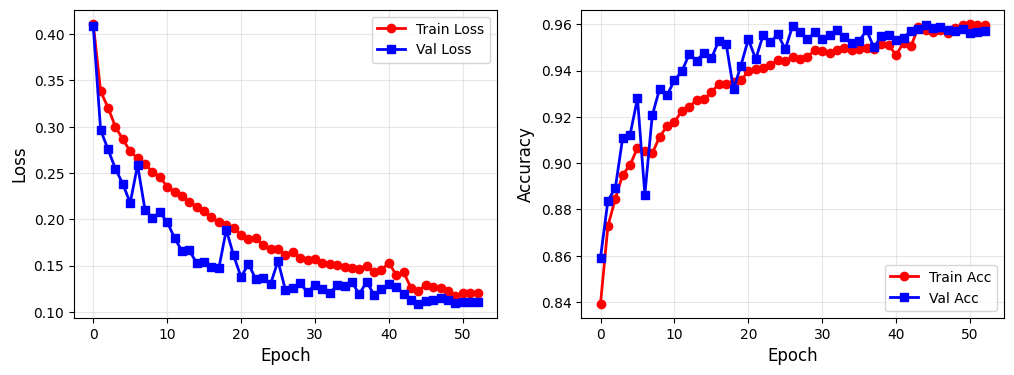

Passando por situação final usando melhor.h5
237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9582 - loss: 0.1078
Best model loaded from melhor.h5 -> val_loss: 0.10868532210588455, val_acc: 0.9596347212791443


In [10]:
if __name__ == '__main__':
    train_model_process(datadir='/kaggle/input/dataset-rbmk/dataset_rbmk') # Pass the correct dataset directory